# AirBnb Booking Analysis


* Project Type = EDA on Airbnb 
* Contribution - Individual

# Project Summary

**Business Context**

Since 2008, guests and hosts have used Airbnb to expand on travelling
possibilities and present a more unique, personalised way of experiencing the
world. Today, Airbnb became one of a kind service that is used and recognized
by the whole world. Data analysis on millions of listings provided through Airbnb
is a crucial factor for the company. These millions of listings generate a lot of
data - data that can be analysed and used for security, business decisions,
understanding of customers' and providers' (hosts) behaviour and performance
on the platform, guiding marketing initiatives, implementation of innovative
additional services and much more. This dataset has around 49,000
observations in it with 16 columns and it is a mix of categorical and numeric
values. Explore and analyse the data to discover key understandings.

Dataset Description

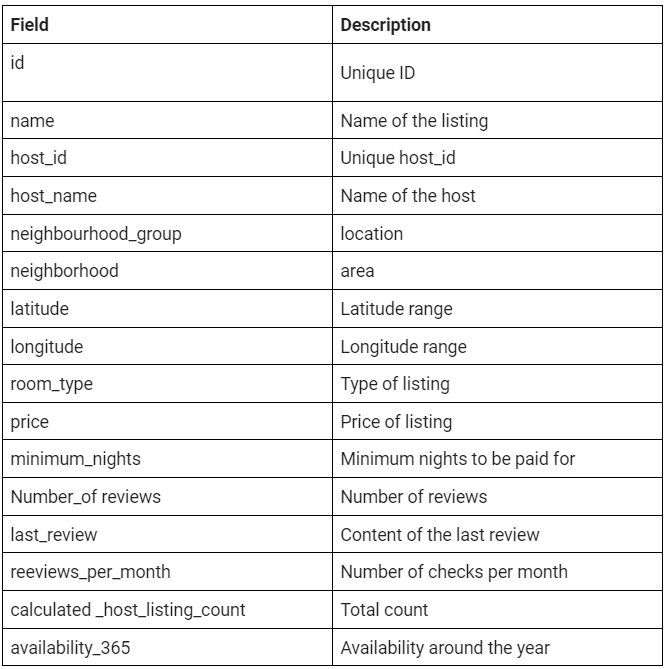

**Main Libraries to be used:**

**Pandas** - for data manipulation, aggregation

**NumPy** - for computationally efficient operations

Matplotlib and Seaborn and **Plotly.express** - for visualisation and behaviour with respect to the target variable. 



# **Problem Statement**


**How the Price is Related to all the Factors ?**

#### **Define Your Business Objective?**

Answer Here. >> Finding the best **Price range**, according to different location, room_type and other factors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Here I'm **importing plotly.express**  for more intresting and responsive charts

### Dataset Loading

In [ ]:
# Creating a link of the CSV dataset
dataset = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSP__sBPN7ys1V0bcLrEl_bSYkAKYzpM69rVvRG-ZbgQRZXoURHqAubYixWtSpL2TooifTYKEMeooq9/pub?output=csv"

# using the urlretrieve class getting the dataset
from urllib.request import urlretrieve
urlretrieve(dataset,"airbnb")

Here I had created link of the data-set provided, to get an smooth Run_time experience. Insted of fetching it from the Drive

### Dataset First View

In [ ]:
# Creating a dataframe from the above dataset
airbnb_df = pd.read_csv('airbnb')

In [ ]:
airbnb_df.sample(5)

##### Create a new dataframe with only the required fields

In [ ]:
columns_needed = airbnb_df.loc[:,['name','neighbourhood_group','neighbourhood','room_type','price',
        'minimum_nights','number_of_reviews','last_review','reviews_per_month',
        'calculated_host_listings_count', 'availability_365']]
                                  
# Creating a dataframe from the above columns and changing their name for easy computation
airbnb = pd.DataFrame(columns_needed)
airbnb.columns=['name','location','area','room_type','price',
                'night_stayed','reviewed','last_review','checks_per_month',
                'host_count', 'availability']


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
airbnb_df.shape # shape of the Initial dataset
airbnb.shape

### Dataset Information

In [ ]:
# Dataset Info
airbnb.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
airbnb[airbnb.duplicated()].count()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
pd.isna(airbnb).sum()

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(airbnb,figsize=(23,5))

### What did you know about your dataset?

* The dataset is having 48895 entries and 11 columns 
* name - 16, last_review - 10052, checks_per_month - 10052 Missing(NaN) values
* There are 5 - catergorical columns and 6 - numerical columns
* It has the data of 5 different location and of 3 different room_types


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb.columns

In [ ]:
# Dataset Describe
airbnb.describe()

### Variables Description 

 ColumnName⟹DataType⟹Type
 
 0   name            ⟹ **object** ⟺ **Categorical** <br>
 1   location          ⟹ **object** ⟺ **Categorical** <br>
 2   area              ⟹ **object** ⟺ **Categorical** <br>
 3   room_type          ⟹  **object** ⟺ **Categorical**<br> 
 4   price              ⟹  **int64** ⟺ **Numerical** <br> 
 5   night_stayed       ⟹  **int64** ⟺ **Numerical** <br> 
 6   reviewed           ⟹  **int64** ⟺ **Numerical** <br> 
 7   last_review        ⟹ **object** ⟺ **Categorical** <br>
 8   checks_per_month   ⟹ **float64** ⟺ **Numerical**<br>
 9   host_count         ⟹  **int64** ⟺ **Numerical** <br> 
 10  availability       ⟹ **int64** ⟺ **Numerical**  

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
airbnb.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
loca = ['Brooklyn', 'Manhattan',  'Queens', 'Bronx', 'Staten Island']
price = list()
area_output = list() 
top10_area = []
rm_type = []
ng_stayed = []
price_of_loc = {}

for l in loca:
  loc_df = airbnb[airbnb['location']==l]
  avg_price_dif = loc_df.price.mean()
  price_dl =  list(loc_df.price)

  ar = loc_df['area'].nunique() #>> returns the count of unique area 
  area_count= loc_df['area'].value_counts().nlargest(10) #>> it will get the top 10 areas
  
  rm_typ_c = loc_df['room_type'].value_counts() #>> it will get the count of all the unique room-type in each location
  ns = loc_df.night_stayed.mean().round()

  price.append(avg_price_dif)
  area_output.append(ar)
  top10_area.append(area_count)
  rm_type.append(rm_typ_c)
  ng_stayed.append(ns)
  price_of_loc.update({l+'price':price_dl})

### What all manipulations have you done and insights you found?

Answer Here.

1.   The data-set doesn't need as such any munipulation
2.   I had just created some list for better Visualization



## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart-1
<h4>Most Popular Location , Average Hotel Price ,
Number of Unique areas in different Location , 
Average Night_stayed in different Location

In [ ]:
x = airbnb['location'].unique()
y1 = airbnb['location'].value_counts()
y2 = price
y3 = area_output
y4 = ng_stayed
df1 = pd.DataFrame(zip(x,y1,y2,y3,y4),columns=['x','y1','y2','y3','y4'])

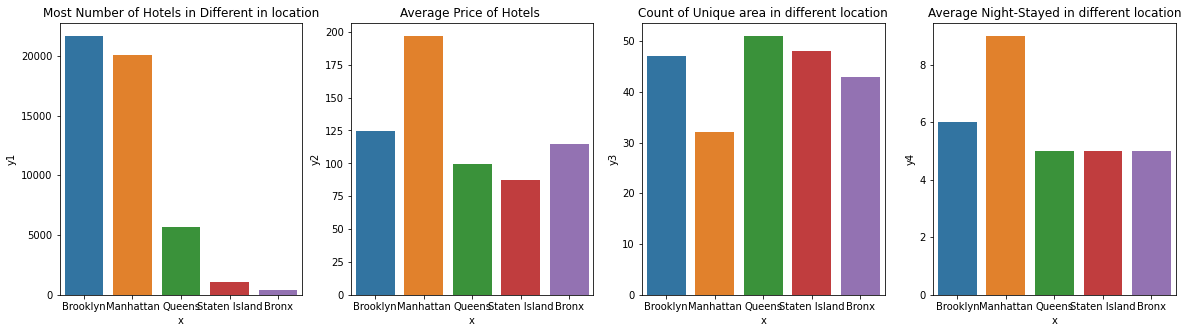

In [27]:
# Graph Code
fig,axes = plt.subplots(1,4,figsize=(20,5))

sns.barplot(x='x',y='y1', data=df1, ax=axes[0])
axes[0].set_title('Most Number of Hotels in Different in location')

sns.barplot(x='x', y='y2', data=df1,ax=axes[1])
axes[1].set_title('Average Price of Hotels ');

sns.barplot(x='x', y='y3', data=df1,ax=axes[2])
axes[2].set_title('Count of Unique area in different location');

sns.barplot(x='x', y='y4', data=df1,ax=axes[3])
axes[3].set_title('Average Night-Stayed in different location');

In [ ]:
## Plotly responsive Chart of the same above representation 

# fig = px.bar(df1,x='x',y=['y1','y3','y4'],barmode ='group',title='Most Number of Hotels in different Location',
#              color = 'y2')
# fig.update_layout(autosize=False, width= 800, height=400)
# fig.show()

##### 2. What is/are the insight(s) found from the chart?

1. Brooklyn has the Max number of Hotels<br>
With lower number of Night_stayed and less avg Hotel Price

2. Manhatten has the 2nd highest number of Hotels,<br> with highest Average-Price of hottels and Highest night Stayed

3. Staten-Island & Bronx has the least number of Hotels<br>
but Average Price in Bornx in High <br>
Having more Unique locations(areas)<br>
and approx 5 days of avg night-stay

##### 1. Why did you pick the specific chart?

Here I have taken **Bar charts** as showing segments of information. Vertical bar charts are useful to compare different categorical values

#### Chart-2
Most Prefered Room Type in all the 5 different location

In [ ]:
brk_RT = rm_type[0].values
man_RT = rm_type[1].values
qns_RT = rm_type[2].values
si_RT = rm_type[3].values
bnx_RT = rm_type[4].values


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = ['Entire home/apt','Private room ','Shared room']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'},{'type':'domain'}], [{'type':'domain'}, {'type':'domain'},{'type':'domain'}]]
fig = make_subplots(rows=2, cols=3, specs=specs,
                    subplot_titles = ['Brooklyn', 'Manhattan',  'Queens', 'Bronx', 'Staten Island'])

fig.add_trace(go.Pie(labels=labels, values= brk_RT, name="Brooklyn"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values= man_RT, name="Manhatten"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values= qns_RT, name="Queens"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values= si_RT, name="Staten Island"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values= bnx_RT, name="Bronx"),
              2, 2)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Most Prefered Room Type of Different locations"
    )
fig.show()


##### 1. Why did you pick the specific chart?

A **pie chart** helps organize and show data as a percentage of a whole

##### 2. What is/are the insight(s) found from the chart?

* **Entire home/apt is most prefered**
* **Private room** is the **second most prefered Room-Type**
* **Shared room** has the **least preference**

#### Chart-3
 Average Price of Different Room_type

In [ ]:
# Average Price of Different Room-Type
fig = px.histogram(airbnb, x="room_type", y="price", barmode='group',
             histfunc='avg',
             height=400)
fig.show()

##### 1. Why did you pick the specific chart?

Here I have taken **Bar charts** as showing segments of information. Vertical bar charts are useful to **compare different categorical values**

##### 2. What is/are the insight(s) found from the chart?

* Entire home/apt has the Highest avg-Price
* Private room has the second highest avg-price
* Shared room has the least avg-price

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer = Even the Entire home/apt has the highest avg_price <br>
It is the most Prefered 

*Therefore, A hotel should have least number of Shared Room to gain max_profit*

#### Chart - 4
Relation of Price with Different Room_type in all the five Locations

In [ ]:
# Relation of Price with Different Room-Types in all the five Locations
fig = px.box(airbnb, x="location", y="price", color='room_type')
fig.show()

##### 1. Why did you pick the specific chart?

<u>Answer Here.</u> **Box plots** are used to **show distributions of numeric data values**, especially when you want to compare them between multiple groups.

They are built to provide high-level information at a glance, offering general ***information about a group of data's symmetry, skew, variance, and outliers.***

##### 2. What is/are the insight(s) found from the chart?

Answer Here 
* The Price had to many Outliers
* The is less variance in Price of all the Five-Locations
* Entire home/apt has the Highest Price-variation

#### chart-5
Distributation of Price and Night_stayed

In [ ]:
# Price Distributation
plt.figure(figsize=(23,4))
sns.kdeplot(airbnb.price);

In [ ]:
# Distibutation of the Night Stayed
plt.figure(figsize=(23,4))
sns.kdeplot(airbnb.night_stayed)

##### 1. Why did you pick the specific chart?

Since, Here its an **univariate visualization**, kde plot is best to show the Probability distributation 

##### 2. What is/are the insight(s) found from the chart?

Here we can see that the **Price & Night_Stayed**<br>
***Is highly left-skewed***

#### Chart-6 
Relation between Price and Night stayed 

In [ ]:
# Relation between Price and Night stayed 
fig = px.scatter(airbnb, x="night_stayed", y="price", color='night_stayed')
fig.update_traces(marker_size=10)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here. **Scatter plots** are used to plot data points on a horizontal and a vertical axis in the **attempt to show how much one variable is affected by another**

##### 2. What is/are the insight(s) found from the chart?

Answer Here :- The Price and Night_Stayed had lots of Outliers and Having a Clustred relation
* For 1 day stay Price varies form 0 to 10k
* For More days Stay Price has a lesser variation

#### Chart - 7- Correlation Heatmap

In [26]:
# Correlation Heatmap visualization code

corr = airbnb.corr()
fig = px.imshow(corr, text_auto=True)
fig.update_layout(autosize = False, width = 1000, height= 600)
fig.show()

##### 1. Why did you pick the specific chart?

Answer Here. **Correlation heatmaps can be used to find potential relationships between variables and to understand the strength of these relationships.** In addition, correlation plots can be used to identify outliers and to detect linear and nonlinear relationships

##### 2. What is/are the insight(s) found from the chart?

Answer Here: 
* Reviewed and Checks_per_month have negative correlation 
* Night_stayed , Host-count and Availability have postitive correlation with Price
* Checks_per_month has higher correlation with Reviewed <br>
    *It means, They are highly related with each other*

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.
* The market is Un-Organised
* More Profit lies in Entire home/apt
* Location to Focus on is Staten-Island and Bronx
* Keep the Hotel Price between 100 to 500
* Manhattan has highest Price of Hotels and with highest number of Night-stay 
 <br>*Therefore, Its a perfect location for max profit*

# **Conclusion**

The Business is very Un-organinsed and Saturated to a lower number with higher level of Compitation. 

The Price has very less relation with the other Factors

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***